In [99]:
#@Author : Karan Garg
#Date : 20-07-2021
#Version
#Python 3.8.2
#Pandas == 1.2.3
#Numpy  == 1.18.2
#seaborn == 0.10.0
#sklearn == 0.11.1

In [100]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

# to handle warings
import warnings
warnings.filterwarnings("ignore")

In [101]:
#reading the main dataframe
data = pd.read_csv('Iris.csv')  #preserving an original dataframe
df=data.copy()                  #copy of the dataframet that we'll use for modelling

In [102]:
# exploring the dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
df.shape

(150, 6)

In [104]:
df.describe()  # to view the stats of the dataframe elements

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [105]:
# dropping the col. 'Id' to avoid overfitting of the model.
df=df.drop('Id',axis=1)

In [106]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [107]:
seto = df[df['Species']=='Iris-setosa']
virg = df[df['Species']=='Iris-virginica']
vers = df[df['Species']=='Iris-versicolor']

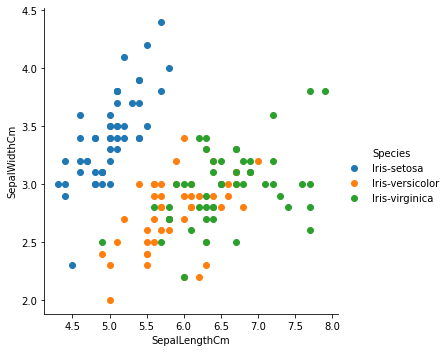

In [108]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

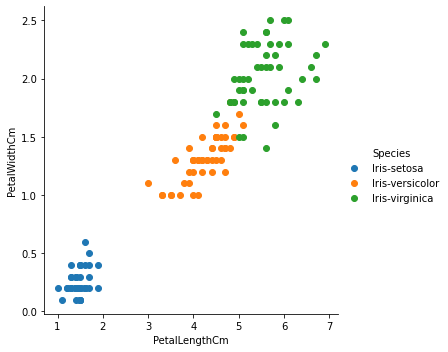

In [109]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

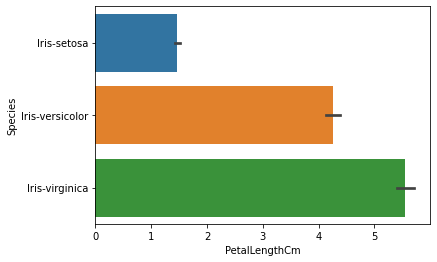

In [110]:
sns.barplot(x = 'PetalLengthCm',y='Species',data=df)
plt.show()

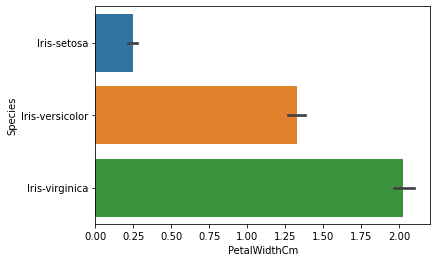

In [111]:
sns.barplot(x = 'PetalWidthCm',y='Species',data=df)
plt.show()

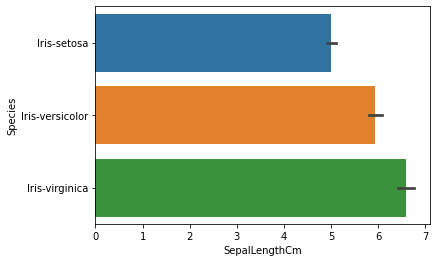

In [112]:
sns.barplot(x = 'SepalLengthCm',y='Species',data=df)
plt.show()

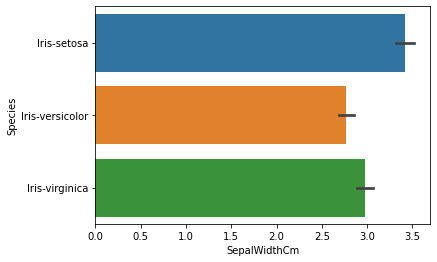

In [113]:
sns.barplot(x = 'SepalWidthCm',y='Species',data=df)
plt.show()

## Data Splitting

In [114]:
# So, now we've 4 independent variables i.e, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
# and 1 dependent(target) variable 'Species'.

In [115]:
# splitting the dataframe, i.e, independent variables in 'x' and target variable in 'y'.
x = df.iloc[:,:-1]
y = df.iloc[: , -1]

In [116]:
x.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [118]:
# Since, the target variable is a categorical variable. Therefore, we'll apply classification 
# for modelling.

In [119]:
#Splitting the dataframes into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0,shuffle=True)
# shuffling the dataframe to avoid overfitting.

# Tree based Model 

In [120]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [121]:
y_predict = dtree.predict(X_test)

In [122]:
print(y_predict)
print('***************')
print(y_test)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']
***************
114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134    

In [123]:
# checking the accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict, y_test)

In [124]:
# Final Score
score

0.9777777777777777